In [ ]:
from google.colab import drive, files
drive.mount ("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Udacity')
!pwd

/content/drive/MyDrive/Colab Notebooks/Udacity


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Udacity/'

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Display full lenght of data in cells
pd.set_option('display.max_colwidth', None)

# Display full length of number of displayed columns
pd.set_option('display.max_columns', None)

# Display floats with 2 decimals
pd.set_option('display.float_format', '{:20,.2f}'.format)

### Import Dataset

In [ ]:
df_archive = pd.read_csv(path+'twitter-archive-enhanced.csv')

df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Programmatic download of the tweet Image predictions

In [ ]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [ ]:
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
                      file.write(response.content)

In [ ]:
os.listdir(folder_name)

['image-predictions.tsv']

In [ ]:
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


I could not get the twitter developer API so i used the tweet_json.txt file provided

In [ ]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [ ]:
!ls

 bestofrt_posters
 bestofrt.tsv
 ebert_reviews
 et_the_extraterrestrial.html
'Gather in Data Wrangling Udacity.ipynb'
 image_predictions
 image-predictions.tsv
 Popular_breed_by_fav_count.jpg
 Popular_breed_by_fav_count.png
 rt_html
 rt-html.zip
'Scatterplots of favorite_count against retweet_count.jpg'
'Scatterplots of favorite_count against retweet_count.png'
 tweet_json.txt
'Tweet Source Counts.jpg'
'Tweet Source Counts.png'
 twitter-archive-enhanced.csv
 twitter_archive_master.csv
'Udacity Data Wrangling Introduction.ipynb'
 Udacity_Investigate_a_Dataset.ipynb
'Web Scraping Udacity.ipynb'


In [ ]:
import os
os.listdir()

['Udacity Data Wrangling Introduction.ipynb',
 'bestofrt.tsv',
 'et_the_extraterrestrial.html',
 'rt-html.zip',
 'rt_html',
 'Web Scraping Udacity.ipynb',
 'ebert_reviews',
 'bestofrt_posters',
 'Udacity_Investigate_a_Dataset.ipynb',
 'twitter-archive-enhanced.csv',
 'image-predictions.tsv',
 'Gather in Data Wrangling Udacity.ipynb',
 'image_predictions',
 'Scatterplots of favorite_count against retweet_count.png',
 'Tweet Source Counts.png',
 'Popular_breed_by_fav_count.png',
 'tweet_json.txt',
 'Popular_breed_by_fav_count.jpg',
 'Scatterplots of favorite_count against retweet_count.jpg',
 'twitter_archive_master.csv',
 'Tweet Source Counts.jpg']

In [ ]:
import json

tweet_list = []
with open('tweet_json.txt', 'r', encoding='utf-8') as file:
  for line in file:
    data = json.loads(line)
    tweet_list.append(data)

In [ ]:
dflist = pd.DataFrame(tweet_list)

In [ ]:
dflist.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN


In [ ]:
type(dflist)

pandas.core.frame.DataFrame

In [ ]:
dflist.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [ ]:
df_add = dflist

In [ ]:
df_add.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,89

In [ ]:
print('df_archive: ',df_archive.shape)
print('df_predictions: ',df_predictions.shape)
print('df_add: ',df_add.shape)

df_archive:  (2356, 17)
df_predictions:  (2075, 12)
df_add:  (2354, 31)


In [ ]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [ ]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [ ]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [ ]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.47,True,collie,0.16,True,Shetland_sheepdog,0.06,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.51,True,miniature_pinscher,0.07,True,Rhodesian_ridgeback,0.07,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.60,True,malinois,0.14,True,bloodhound,0.12,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.41,True,redbone,0.36,True,miniature_pinscher,0.22,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.56,True,Rottweiler,0.24,True,Doberman,0.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,English_springer,0.23,True,German_short-haired_pointer,0.18,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.17,False,Labrador_retriever,0.17,True,spatula,0.04,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.32,True,Pekinese,0.09,True,papillon,0.07,True


In [ ]:
df_add

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,None,NaN,None,None,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}",None,None,None,None,False,8853,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,89

### Quality Issues

- Visual & Programmatic Assessment

1. Twitter archive table - inconsistent values in name column

2. Twitter archive table - missing values in name column recorded as none 

3. Twitter archive table - missing values in retweeted_status_id column

4. Twitter archive table - missing values in retweeted_status_user_id column

5. Twitter archive table - missing values in retweeted_status_timestamp column

6. Twitter archive table - incorrect datatype for timestamp

7. Twitter archive table - missing values in reply_to_status_id column

8. Twitter archive table - missing values in reply_to_user_id column

9. Image predictions table - inconsistent values format - capital and small letters in p1 column

10. Image predictions table - inconsistent values format - capital and small letters in p2 column

11. Image predictions table - inconsistent values format - capital and small letters in p3 column

12. Image predictions table - Missing records (2075 instead of 2356)

13.   Twitter API table - id column name not consistent with the other two tables

15. Remove all rows with retweets in twitter api table

15. Select only the required columns (tweet_id, retweet_count, favorite_count)

16. Extract rating scores correctly from tweet text using RegEx and convert it to float

In [ ]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,"2,356.00",78.00,78.00,181.00,181.00,"2,356.00","2,356.00"
mean,"742,771,590,321,692,416.00","745,507,917,855,750,784.00","20,141,706,360,873,220.00","772,039,961,038,007,040.00","12,416,983,653,017,598.00",13.13,10.46
std,"68,567,047,444,761,000.00","75,824,920,044,192,880.00","125,279,666,255,236,304.00","62,369,278,105,055,600.00","95,992,535,331,517,504.00",45.88,6.75
min,"666,020,888,022,790,144.00","665,814,696,700,723,200.00","11,856,342.00","666,104,133,288,665,088.00","783,214.00",0.00,0.00
25%,"678,398,938,214,475,776.00","675,741,911,993,464,832.00","308,637,448.75","718,631,497,683,582,976.00","4,196,983,835.00",10.00,10.00
50%,"719,627,934,716,235,776.00","703,870,840,226,598,912.00","4,196,983,835.00","780,465,709,297,995,776.00","4,196,983,835.00",11.00,10.00
75%,"799,337,304,954,252,288.00","825,780,371,286,566,912.00","4,196,983,835.00","820,314,633,777,061,888.00","4,196,983,835.00",12.00,10.00
max,"892,420,643,555,336,192.00","886,266,357,075,128,320.00","840,547,864,354,918,400.00","887,473,957,103,951,872.00","787,461,778,435,289,088.00","1,776.00",170.00


In [ ]:
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,"2,075.00","2,075.00","2,075.00","2,075.00","2,075.00"
mean,"738,451,357,852,529,152.00",1.20,0.59,0.13,0.06
std,"67,852,033,330,235,664.00",0.56,0.27,0.10,0.05
min,"666,020,888,022,790,144.00",1.00,0.04,0.00,0.00
25%,"676,483,507,139,540,992.00",1.00,0.36,0.05,0.02
50%,"711,998,809,858,043,904.00",1.00,0.59,0.12,0.05
75%,"793,203,448,525,178,880.00",1.00,0.84,0.20,0.09
max,"892,420,643,555,336,192.00",4.00,1.00,0.49,0.27


In [ ]:
df_add.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,"2,354.00",78.00,78.00,"2,354.00","2,354.00",29.00
mean,"742,697,816,435,036,160.00","745,507,917,855,750,784.00","20,141,706,360,873,220.00","3,164.80","8,080.97","816,268,554,633,332,608.00"
std,"68,528,120,712,910,672.00","75,824,920,044,192,880.00","125,279,666,255,236,304.00","5,284.77","11,814.77","61,641,605,265,675,576.00"
min,"666,020,888,022,790,144.00","665,814,696,700,723,200.00","11,856,342.00",0.00,0.00,"672,108,316,018,024,448.00"
25%,"678,397,510,244,808,704.00","675,741,911,993,464,832.00","308,637,448.75",624.50,"1,415.00","788,818,328,538,099,712.00"
50%,"719,459,571,111,233,536.00","703,870,840,226,598,912.00","4,196,983,835.00","1,473.50","3,603.50","834,086,676,934,836,224.00"
75%,"799,305,849,241,918,464.00","825,780,371,286,566,912.00","4,196,983,835.00","3,652.00","10,122.25","866,458,718,883,467,264.00"
max,"892,420,643,555,336,192.00","886,266,357,075,128,320.00","840,547,864,354,918,400.00","79,515.00","132,810.00","886,053,434,075,471,872.00"


In [ ]:
print('no of df_archive duplicates: ', df_archive.duplicated().sum())
print('no of df_predictions duplicates: ', df_predictions.duplicated().sum())


no of df_archive duplicates:  0
no of df_predictions duplicates:  0


# Tidiness Issues

Tidiness: issues with structure that prevent easy analysis. Untidy data is also known as messy data. Tidy data requirements:
Each variable forms a column.
Each observation forms a row.
Each type of observational unit forms a table.

1. Combine the third table from twitter api with the first table of twitter enhanced csv to have only two tables

2. Drop irrelevant columns in Twitter enhanced archive table - with a high amount of null values

3. Extract tweet source from source and convert it to category datatype

4. Create dog_stages column and remove (doggo, floofer, pupper, puppo) columns.

5. Drop rows with values other than 10 for rating_denominator to have uniform data

6. Remove rows with invalid names in the dataframe

7. Remove ratings and links from text column using RegEx.

8. Drop Image number columns in df_2_clean (predictions table)

9. Condense the p1, p2, p3 and p1_conf, p2_conf, p3_conf to get the breed and confidence columns with highest confidence predictions and drop other columns

10. Merge the df_4 with the df_2_clean (predictions table)

### Cleaning Data

In [ ]:
#Create copy of each data

df_archive_clean = df_archive.copy()
df_predictions_clean = df_predictions.copy()
df_add_clean = df_add.copy()

### 1. Twitter archive table - inconsistent values in name column

**Define: Drop rows with one letter names.**

**Code**

In [ ]:
df_archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [ ]:
index_names = df_archive_clean[df_archive_clean['name'] == 'a'].index

df_archive_clean.drop(index_names, inplace = True)

**Test**

In [ ]:
df_archive_clean.name.value_counts()

None          745
Charlie        12
Cooper         11
Lucy           11
Oliver         11
             ... 
Aqua            1
Chase           1
Meatball        1
Rorie           1
Christoper      1
Name: name, Length: 956, dtype: int64

### 2. Twitter archive table - missing values in name column recorded as none 

**Define**

Replace the rows with values of 'none' to 'nan' 

**Code**

In [ ]:
df_archive_clean.replace(to_replace='None', value=np.nan, inplace=True)

**Test**

In [ ]:
df_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,NaN,NaN,NaN


In [ ]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2301 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2301 non-null   object 
 4   source                      2301 non-null   object 
 5   text                        2301 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2242 non-null   object 
 10  rating_numerator            2301 non-null   int64  
 11  rating_denominator          2301 non-null   int64  
 12  name                        1556 non-null   object 
 13  doggo                       97 no


### 3. Twitter archive table - missing values in retweeted_status_id column

### 4. Twitter archive table - missing values in retweeted_status_user_id column

### 5. Twitter archive table - missing values in retweeted_status_timestamp column

**Define**

Drop these columns

**Code**

In [ ]:
df_archive_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [ ]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### 6. Twitter archive table - incorrect datatype for timestamp

**Define**

Convert the object datatype to datatime datatype

**Code**

In [ ]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])

**Test**

In [ ]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2301 non-null   int64              
 1   in_reply_to_status_id  78 non-null     float64            
 2   in_reply_to_user_id    78 non-null     float64            
 3   timestamp              2301 non-null   datetime64[ns, UTC]
 4   source                 2301 non-null   object             
 5   text                   2301 non-null   object             
 6   expanded_urls          2242 non-null   object             
 7   rating_numerator       2301 non-null   int64              
 8   rating_denominator     2301 non-null   int64              
 9   name                   1556 non-null   object             
 10  doggo                  97 non-null     object             
 11  floofer                10 non-null     object           

### 7. Twitter archive table - missing values in reply_to_status_id column

### 8. Twitter archive table - missing values in reply_to_user_id column

**Define**

Drop these columns

**Code**

In [ ]:
df_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

**Test**

In [ ]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### 9. Image predictions table - inconsistent values format - capital and small letters in p1 column

**Define**

Capitalize the first letter of the word and the first letter after after an underscore for all entries in the column with regular expression

**Code**

In [ ]:
import re 
df_predictions_clean['p1'] = df_predictions_clean['p1'].str.replace('(^|[_])\s*([A-Za-z])', lambda match: match[0].upper(), regex=True)

**Test**

In [ ]:
df_predictions_clean['p1']

0       Welsh_Springer_Spaniel
1                      Redbone
2              German_Shepherd
3          Rhodesian_Ridgeback
4           Miniature_Pinscher
                 ...          
2070                    Basset
2071               Paper_Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

### 10. Image predictions table - inconsistent values format - capital and small letters in p2 column

**Define**

Capitalize the first letter of the word and the first letter after after an underscore for all entries in the column with regular expression

**Code**

In [ ]:
df_predictions_clean['p2'] = df_predictions_clean['p2'].str.replace('(^|[_])\s*([A-Za-z])', lambda match: match[0].upper(), regex=True)

**Test**

In [ ]:
df_predictions_clean['p2'].head()

0                Collie
1    Miniature_Pinscher
2              Malinois
3               Redbone
4            Rottweiler
Name: p2, dtype: object

### 11. Image predictions table - inconsistent values format - capital and small letters in p3 column

**Define**

Capitalize the first letter of the word and the first letter after after an underscore for all entries in the column with regular expression

**Code**

In [ ]:
df_predictions_clean['p3'] = df_predictions_clean['p3'].str.replace('(^|[_])\s*([A-Za-z])', lambda match: match[0].upper(), regex=True)

**Test**

In [ ]:
df_predictions_clean['p3'].head()

0      Shetland_Sheepdog
1    Rhodesian_Ridgeback
2             Bloodhound
3     Miniature_Pinscher
4               Doberman
Name: p3, dtype: object

### 13. Twitter API table - id column name not consistent with the other two tables

**Define**

Rename id column to match the other tables (tweet_id)

**Code**

In [ ]:
df_add_clean.rename(columns={'id':'tweet_id'}, inplace=True)

**Test**

In [ ]:
df_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   tweet_id                       2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

**Define**

### 14. Remove Rows with Retweets in the twitter api table

**Code**

In [ ]:
# This removes the retweets in the twitter api table by removing all rows where retweet_status is not null. 
print(df_add_clean['retweeted_status'].notnull().sum())
df_add_clean = df_add_clean[df_add_clean['retweeted_status'].isna()]

179


**Test**

In [ ]:
# Below checks the retweets have been effectively removed.
df_add_clean['retweeted_status'].notnull().sum()

0

**Define**

### 15. Select only the required columns (tweet_id, retweet_count, favorite_count)

**Code**

In [ ]:
df_add_clean = df_add_clean[['tweet_id', 'favorite_count', 'retweet_count']]

**Test**

In [ ]:
df_add_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

In [ ]:
df_add_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2175 non-null   int64
 1   favorite_count  2175 non-null   int64
 2   retweet_count   2175 non-null   int64
dtypes: int64(3)
memory usage: 68.0 KB


### 16. Extract rating scores correctly from tweet text using RegEx and convert it to float in the twitter enhanced table because it was notproperly extracted

**Define**

Extract rating scores correctly from tweet text using RegEx and convert it to float in the twitter enhanced table

**Code**

In [ ]:
df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]

<ipython-input-59-ea0dc2a3d8e9>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text','rating_numerator']]


,text,rating_numerator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


In [ ]:
cleaned_ratings = df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
cleaned_ratings

<ipython-input-60-21c22da32c92>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  cleaned_ratings = df_archive_clean[df_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")


,0
45,13.5
340,9.75
695,9.75
763,11.27
1689,9.5
1712,11.26


In [ ]:
df_archive_clean.loc[cleaned_ratings.index, 'rating_numerator'] = cleaned_ratings.values

In [ ]:
df_archive_clean.rating_numerator = df_archive_clean.rating_numerator.astype('float')

**Test**

In [ ]:
df_archive_clean.loc[cleaned_ratings.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.50,10,Bella,NaN,NaN,NaN,NaN
340,832215909146226688,2017-02-16 13:11:49+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,NaN,NaN,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,NaN,NaN,NaN,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,10,Sophie,NaN,NaN,pupper,NaN
1689,681340665377193984,2015-12-28 05:07:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,9.50,10,NaN,NaN,NaN,NaN,NaN
1712,680494726643068929,2015-12-25 21:06:00+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,11.26,10,NaN,NaN,NaN,NaN,NaN


### Clean Tidiness Issues

1. Drop irrelevant columns in Twitter enhanced archive table - with a high amount of null values

**Define**

Drop the dog stages columns

**Code**

In [ ]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2301 non-null   int64              
 1   timestamp           2301 non-null   datetime64[ns, UTC]
 2   source              2301 non-null   object             
 3   text                2301 non-null   object             
 4   expanded_urls       2242 non-null   object             
 5   rating_numerator    2301 non-null   float64            
 6   rating_denominator  2301 non-null   int64              
 7   name                1556 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              253 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), float64

**Test**

In [ ]:
df_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2345,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10.00,10,the,NaN,NaN,NaN,NaN
2346,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.00,10,the,NaN,NaN,NaN,NaN
2349,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.00,10,an,NaN,NaN,NaN,NaN
2351,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.00,10,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2301 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2301 non-null   int64              
 1   timestamp           2301 non-null   datetime64[ns, UTC]
 2   source              2301 non-null   object             
 3   text                2301 non-null   object             
 4   expanded_urls       2242 non-null   object             
 5   rating_numerator    2301 non-null   float64            
 6   rating_denominator  2301 non-null   int64              
 7   name                1556 non-null   object             
 8   doggo               97 non-null     object             
 9   floofer             10 non-null     object             
 10  pupper              253 non-null    object             
 11  puppo               30 non-null     object             
dtypes: datetime64[ns, UTC](1), float64


### 2. Combine the third table from twitter api with the first table of twitter enhanced csv to have only two tables

### Define

Merge the twitter api table with the twitter enhanced table using inner join

**Code**

In [ ]:
df_4 = pd.merge(df_archive_clean, df_add_clean, how='inner', on='tweet_id')

**Test**

In [ ]:
df_4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10,Phineas,NaN,NaN,NaN,NaN,39467,8853
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,NaN,NaN,NaN,NaN,33819,6514
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,NaN,NaN,NaN,NaN,25461,4328
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,NaN,NaN,NaN,NaN,42908,8964
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,NaN,NaN,NaN,NaN,41048,9774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,10.00,10,the,NaN,NaN,NaN,NaN,496,232
2116,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8.00,10,the,NaN,NaN,NaN,NaN,115,61
2117,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2.00,10,an,NaN,NaN,NaN,NaN,1253,879
2118,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.00,10,NaN,NaN,NaN,NaN,NaN,111,41


### 3. Extract tweet source from source and convert to categorical datatype

**Define:**

Extract tweet source from source and convert to categorical datatype

**Code**

In [ ]:
#make a function extract_source which extract the strings between tags
def extract_source(x):
    'x is an html string from the source column in df_arch_cleaned dataset'
    #find the first closed  tag >
    i= x.find('>') + 1
    # find the first open tag after the previous <
    j =x[i:].find('<')
    # extract the text in between
    return x[i:][:j]

In [ ]:
df_4.source = df_4.source.apply(lambda x: extract_source(x)).astype('category')

**Test**

In [ ]:
# check for the unique values
df_4.source.unique()

['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene', 'TweetDeck']
Categories (4, object): ['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone',
                         'Vine - Make a Scene']

### 4. Extract rating scores correctly from tweet text using RegEx and convert it to float

**Define**

Extract rating scores correctly from tweet text using RegEx and convert it to float

**Code**

In [ ]:
df_4[df_4.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

<ipython-input-72-990ecceee1a6>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_4[df_4.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]


,text,rating_numerator
42,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50
556,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75
615,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27
1495,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50
1518,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26


In [ ]:
clean_ratings = df_4[df_4.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
clean_ratings

<ipython-input-73-d359d09f00a4>:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  clean_ratings = df_4[df_4.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")


,0
42,13.5
556,9.75
615,11.27
1495,9.5
1518,11.26


In [ ]:
df_4.loc[clean_ratings.index, 'rating_numerator'] = clean_ratings.values

In [ ]:
df_4.rating_numerator = df_archive_clean.rating_numerator.astype('float')

**Test**

In [ ]:
df_4.loc[clean_ratings.index]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,retweet_count
42,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.00,10,Bella,NaN,NaN,NaN,NaN,46860,10407
556,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,13.00,10,Logan,NaN,NaN,NaN,NaN,20296,7069
615,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,https://twitter.com/dog_rates/status/778027034220126208/photo/1,13.00,10,Sophie,NaN,NaN,pupper,NaN,7320,1885
1495,681340665377193984,2015-12-28 05:07:27+00:00,Twitter for iPhone,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,NaN,10.00,10,NaN,NaN,NaN,NaN,NaN,1803,313
1518,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,https://twitter.com/dog_rates/status/680494726643068929/photo/1,12.00,10,NaN,NaN,NaN,NaN,NaN,1879,542


**Define**

5. Drop rows with values other than 10 for rating_denominator to have uniform data

**Code**

In [ ]:
df_4 = df_4[df_4['rating_denominator'] == 10]

**Test**

In [ ]:
df_4[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,"2,071.00","2,099.00"
mean,13.58,10.00
std,48.85,0.00
min,0.00,10.00
25%,10.00,10.00
50%,11.00,10.00
75%,12.00,10.00
max,"1,776.00",10.00


4. Create dog_stages column and remove (doggo, floofer, pupper, puppo) columns.

**Define**

Create dog_stage column and remove the (doggo, floofer, pupper, puppo) columns and convert to category datatype

**Code**

In [ ]:
# select the dog stages columns from the dataset
cols = ['doggo', 'floofer', 'pupper', 'puppo']

# create the dog_stage column with joining the four columns in one column dog_stage join for more than stage
df_4['dog_stage'] = df_4[cols].apply(lambda x:','.join(x.dropna().astype(str)),axis =1)

# replace the empty string with nan and change datatype to category
df_4.dog_stage = df_4.dog_stage.replace('', np.nan).astype('category')

# drop the 4 columns
df_4 = df_4.drop(columns = cols, axis =1)

<ipython-input-79-3e8568847407>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['dog_stage'] = df_4[cols].apply(lambda x:','.join(x.dropna().astype(str)),axis =1)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_4

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.00,10,Phineas,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,41048,9774,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2115,666063827256086533,2015-11-16 01:22:45+00:00,Twitter for iPhone,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,https://twitter.com/dog_rates/status/666063827256086533/photo/1,11.00,10,the,496,232,NaN
2116,666058600524156928,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,https://twitter.com/dog_rates/status/666058600524156928/photo/1,NaN,10,the,115,61,NaN
2117,666051853826850816,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,https://twitter.com/dog_rates/status/666051853826850816/photo/1,12.00,10,an,1253,879,NaN
2118,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,10.00,10,NaN,111,41,NaN


**Test**

In [ ]:
df_4.dog_stage.value_counts()

pupper           220
doggo             75
puppo             24
doggo,pupper      10
floofer            9
doggo,floofer      1
doggo,puppo        1
Name: dog_stage, dtype: int64

### 6. Remove rows with invalid names in the dataframe

***Define***

Remove rows with invalid names in the dataframe

In [ ]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 0 to 2119
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2099 non-null   int64              
 1   timestamp           2099 non-null   datetime64[ns, UTC]
 2   source              2099 non-null   category           
 3   text                2099 non-null   object             
 4   expanded_urls       2045 non-null   object             
 5   rating_numerator    2071 non-null   float64            
 6   rating_denominator  2099 non-null   int64              
 7   name                1435 non-null   object             
 8   favorite_count      2099 non-null   int64              
 9   retweet_count       2099 non-null   int64              
 10  dog_stage           340 non-null    category           
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(4), object(3)
memory usage: 168.6+ KB

In [ ]:
df_4.name.replace(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad',
       'an', 'very', 'just', 'my', 'his', 'actually', 'getting',
       'this', 'unacceptable', 'all', 'old', 'infuriating', 'the',
       'by', 'officially', 'life', 'light', 'space', 'None'], np.nan, inplace=True)

**Test**

In [ ]:
df_4.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


**Define**

### 7. Remove ratings and links from text column using RegEx.

In [ ]:
df_4.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"

In [ ]:
df_4.text = df_4.text.str.extract('(.+(?=\s\d+/\d+\s))')

### 8. Drop Image number columns in (predictions table)

**Define**

Drop Image number columns in (predictions table)

**Code**

In [ ]:
df_predictions_clean.drop('img_num', axis=1, inplace=True)

**Test**

In [ ]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   p1        2075 non-null   object 
 3   p1_conf   2075 non-null   float64
 4   p1_dog    2075 non-null   bool   
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p2_dog    2075 non-null   bool   
 8   p3        2075 non-null   object 
 9   p3_conf   2075 non-null   float64
 10  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### 9. Condense the p1, p2, p3 and p1_conf, p2_conf, p3_conf to get the breed and confidence columns with highest confidence predictions and drop other columns

**Code**

In [ ]:
breed = []
confidence = []
# iterating over df_pred row by row and taking the highest confident prediction other wise np.nan
for index, row in df_predictions_clean.iterrows():
    if row['p1_dog'] and row['p1_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] and row['p2_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] and row['p3_conf'] == max([row['p1_conf'], row['p2_conf'], row['p3_conf']]):
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append(np.nan)
        confidence.append(np.nan)
        
df_predictions_clean['breed'] = breed
df_predictions_clean['confidence'] = confidence

In [ ]:
df_predictions_clean = df_predictions_clean[['tweet_id', 'jpg_url', 'breed', 'confidence']]

**Test**

In [ ]:
df_predictions_clean.sample(5)

,tweet_id,jpg_url,breed,confidence
981,707377100785885184,https://pbs.twimg.com/media/CdEbt0NXIAQH3Aa.jpg,Golden_Retriever,0.64
929,702932127499816960,https://pbs.twimg.com/media/CcFRCfRW4AA5a72.jpg,NaN,NaN
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/680440290977693696/pu/img/B900g7b-n-zhnwi5.jpg,NaN,NaN
439,674436901579923456,https://pbs.twimg.com/media/CVwUyM9WwAAGDjv.jpg,NaN,NaN
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,Chihuahua,0.71


**Define**

### 10. Merge the df_4 with the df_2_clean (predictions table)

**Code**

In [ ]:
df_master = pd.merge(df_predictions_clean, df_4, on='tweet_id')

In [ ]:
df_master.head()

,tweet_id,jpg_url,breed,confidence,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.47,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair.,https://twitter.com/dog_rates/status/666020888022790149/photo/1,6.00,10,NaN,2535,532,NaN
1,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,0.56,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.,https://twitter.com/dog_rates/status/666049248165822465/photo/1,10.00,10,NaN,111,41,NaN
2,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well.,https://twitter.com/dog_rates/status/666051853826850816/photo/1,12.00,10,NaN,1253,879,NaN
3,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_Poodle,0.20,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad).,https://twitter.com/dog_rates/status/666058600524156928/photo/1,NaN,10,NaN,115,61,NaN
4,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_Retriever,0.78,2015-11-16 01:22:45+00:00,Twitter for iPhone,This is the happiest dog you will ever see. Very committed owner. Nice couch.,https://twitter.com/dog_rates/status/666063827256086533/photo/1,11.00,10,NaN,496,232,NaN


### Store the cleaned master DataFrame in a CSV file with the main one named twitter_archive_master.csv

In [ ]:
df_master.to_csv('twitter_archive_master.csv', index=False)

### Test

In [ ]:
df = pd.read_csv('twitter_archive_master.csv')

In [ ]:
df

,tweet_id,jpg_url,breed,confidence,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_stage
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_Springer_Spaniel,0.47,2015-11-15 22:32:08+00:00,Twitter for iPhone,Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair.,https://twitter.com/dog_rates/status/666020888022790149/photo/1,6.00,10,NaN,2535,532,NaN
1,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature_Pinscher,0.56,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased.,https://twitter.com/dog_rates/status/666049248165822465/photo/1,10.00,10,NaN,111,41,NaN
2,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,NaN,2015-11-16 00:35:11+00:00,Twitter for iPhone,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well.,https://twitter.com/dog_rates/status/666051853826850816/photo/1,12.00,10,NaN,1253,879,NaN
3,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,Miniature_Poodle,0.20,2015-11-16 01:01:59+00:00,Twitter for iPhone,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad).,https://twitter.com/dog_rates/status/666058600524156928/photo/1,NaN,10,NaN,115,61,NaN
4,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,Golden_Retriever,0.78,2015-11-16 01:22:45+00:00,Twitter for iPhone,This is the happiest dog you will ever see. Very committed owner. Nice couch.,https://twitter.com/dog_rates/status/666063827256086533/photo/1,11.00,10,NaN,496,232,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.56,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such.","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.00,10,Franklin,41048,9774,NaN
1918,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.00,10,Darla,42908,8964,NaN
1919,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.72,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike.,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.00,10,Archie,25461,4328,NaN
1920,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.32,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit.",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.00,10,Tilly,33819,6514,NaN


## Analyzing and Visualizing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1922 entries, 0 to 1921
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1922 non-null   int64  
 1   jpg_url             1922 non-null   object 
 2   breed               1420 non-null   object 
 3   confidence          1420 non-null   float64
 4   timestamp           1922 non-null   object 
 5   source              1922 non-null   object 
 6   text                1854 non-null   object 
 7   expanded_urls       1922 non-null   object 
 8   rating_numerator    1895 non-null   float64
 9   rating_denominator  1922 non-null   int64  
 10  name                1347 non-null   object 
 11  favorite_count      1922 non-null   int64  
 12  retweet_count       1922 non-null   int64  
 13  dog_stage           302 non-null    object 
dtypes: float64(2), int64(4), object(8)
memory usage: 210.3+ KB


In [ ]:
df.describe()

,tweet_id,confidence,rating_numerator,rating_denominator,favorite_count,retweet_count
count,"1,922.00","1,420.00","1,895.00","1,922.00","1,922.00","1,922.00"
mean,"737,364,584,110,746,240.00",0.61,13.81,10.00,"9,087.59","2,817.94"
std,"67,775,450,573,954,360.00",0.26,51.06,0.00,"12,321.75","4,722.94"
min,"666,020,888,022,790,144.00",0.04,1.00,10.00,81.00,16.00
25%,"676,584,303,991,503,872.00",0.39,10.00,10.00,"2,072.50",653.00
50%,"709,910,027,549,720,576.00",0.61,11.00,10.00,"4,228.00","1,390.50"
75%,"790,322,471,594,496,000.00",0.86,12.00,10.00,"11,518.00","3,261.00"
max,"892,420,643,555,336,192.00",1.00,"1,776.00",10.00,"132,810.00","79,515.00"


### **Univariate Analysis**

Distribution of the retweet_count

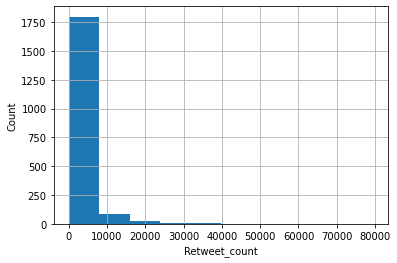

In [ ]:
df['retweet_count'].hist()
plt.xlabel('Retweet_count')
plt.ylabel('Count')
plt.show()

Distribution of the favorite_count

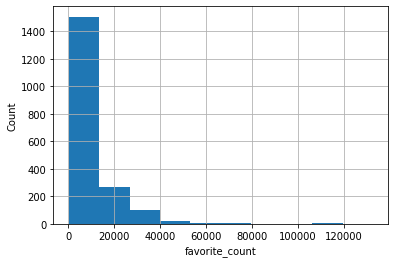

In [ ]:
df['favorite_count'].hist()
plt.xlabel('favorite_count')
plt.ylabel('Count')
plt.show()

Distribution of the rating_numerator

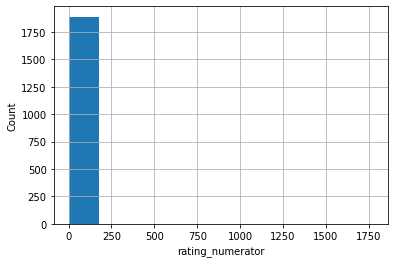

In [ ]:
df['rating_numerator'].hist()
plt.xlabel('rating_numerator')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

Scatterplots of favorite_count against retweet_count

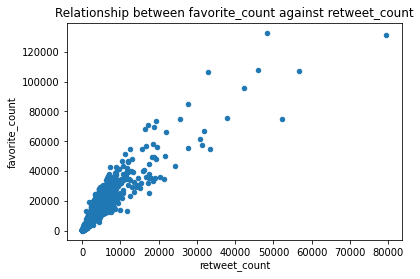

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
df.plot(x='retweet_count', y='favorite_count', kind='scatter')
plt.title('Relationship between favorite_count against retweet_count')
plt.show()
plt.savefig('Scatterplots of favorite_count against retweet_count.jpg')
files.download('Scatterplots of favorite_count against retweet_count.jpg')

This shows a positive relationship

## Question(s) for Analysis


1. Which tweet source is the most popular?

2. Top 5 most popular dog breed by favorite count??

3. What are the most common dog names?

4. Which breed has the highest retweet count?

Which tweet source is the most popular?

In [ ]:
df.source.value_counts()

Twitter for iPhone    1886
Twitter Web Client      25
TweetDeck               11
Name: source, dtype: int64

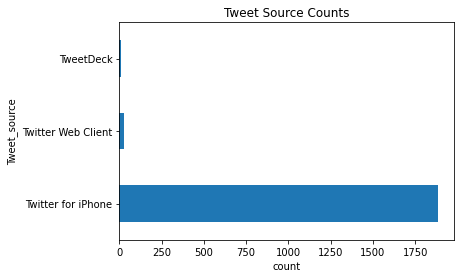

<Figure size 432x288 with 0 Axes>

In [ ]:
df.source.value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Tweet_source')
plt.title('Tweet Source Counts')
plt.show()
plt.savefig('Tweet Source Counts.jpg')

Top 5 most popular dog breed by favorite count?

In [ ]:
Top_5_most_popular_dog_breed_by_favorite_count = df[['breed', 'favorite_count']].sort_values('favorite_count', ascending=False).head(5)
data = Top_5_most_popular_dog_breed_by_favorite_count
data

,breed,favorite_count
1613,Lakeland_Terrier,132810
1155,Labrador_Retriever,131075
1864,English_Springer,107956
1524,Chihuahua,107015
1814,French_Bulldog,106827


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


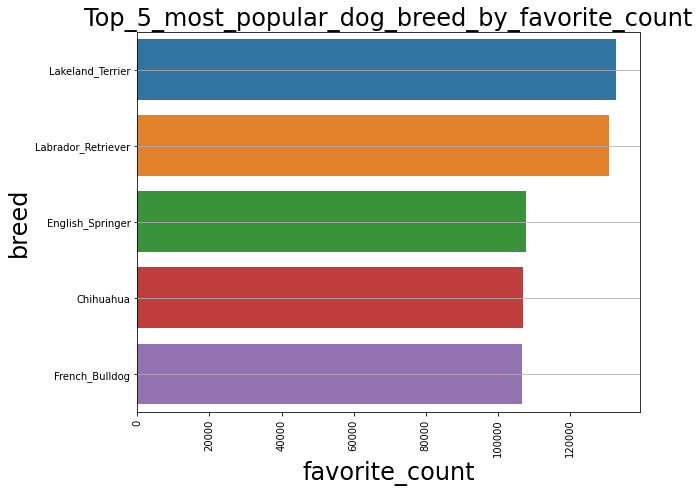

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(data['favorite_count'],data['breed'])
plt.title(label='Top_5_most_popular_dog_breed_by_favorite_count', fontdict={'fontsize':24, 'fontweight':4})
plt.xlabel('favorite_count', fontdict={'fontsize':24, 'fontweight':4})
plt.ylabel('breed', fontdict={'fontsize':24, 'fontweight':4})
plt.xticks(rotation=90)
plt.grid(visible=True, which='major', axis='y')
plt.show()
plt.savefig('Popular_breed_by_fav_count.jpg')

Top 10 most common dog names?

In [ ]:
df.name.value_counts().head(10)

Charlie    11
Cooper     10
Oliver     10
Lucy       10
Penny       9
Tucker      9
Sadie       8
Winston     8
Daisy       7
Lola        7
Name: name, dtype: int64

Which breed has the highest retweet count?

In [ ]:
most_popular_dog_breed_by_retweet_count = df[['breed', 'retweet_count']].sort_values('retweet_count', ascending=False).head(1)
data = most_popular_dog_breed_by_retweet_count
data

,breed,retweet_count
1155,Labrador_Retriever,79515


## Insights

1. There is a positive relationship between retweet_count and favorite_count

2. The most common tweet source is twitter_iphone

3. The most common breed by favorite count is Lakeland Terrier

4. The most common breed by retweet count is also Labrador retriever

5. The most common dog name is Charlie

Useful links ;

https://stackoverflow.com/questions/60206464/saving-figures-using-plt-savfig-on-google-colab-with-axes

https://pandas.pydata.org/docs/

https://regex101.com/

https://stackoverflow.com/questions/7911504/python-string-operation-extract-text-between-html-tags

https://www.tutorialspoint.com/how-to-read-a-json-file-into-a-dataframe-using-python-pandas-library

https://github.com/ahmed-gharib89/wrangle-and-analyze_data/blob/master/wrangle_act.ipynb

https://stackoverflow.com/questions/47857154/how-to-read-json-object-in-python

https://stackoverflow.com/questions/53950410/how-to-capitalize-specific-letters-in-a-string-given-certain-rules

https://datacarpentry.org/python-socialsci/11-joins/index.html

https://www.geeksforgeeks.org/python-pandas-melt/
